In [1]:
cd /data/store01/data_dirs/students/ucfafyi/Sentinel

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [61]:
import sys
sys.path.insert(0, 'python')
from fastRWpkl import *
from glob import glob
import pylab as plt
%matplotlib inline
from applied import *
from scipy.stats import linregress, gaussian_kde
from nicer_plot import *
from matplotlib import colors, cm, gridspec
from geo_trans import *
from Py6S import *
import pandas as pd
from smoothn import *

In [3]:
general_psf = [[  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682],
       [  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682],
       [  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682],
       [  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682],
       [  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682],
       [  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682],
       [  34.19600463,  436.11482328,    7.87349434,  -21.79469247,
          60.57048682]]
general_psf = np.array(general_psf)

In [4]:
spath = '/home/ucfafyi/DATA/Sentinel/s_data/36/M/XE/2016/1/8/0/'
mfile = [ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016009.h21v09.005.2016026084439.hdf',
 '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016009.h21v09.005.2016026084439.hdf']
lat, lon, year = -0.41667,34.2, 2016


Here is the cloud probability calculation!

/home/ucfafyi/DATA/Sentinel/s_data/36/M/XE/2016/1/8/0/ (2, 3, 4, 8, 11, 12, 13)
No meteo data!!!
7%
14%
21%
29%
36%
43%
50%
57%
64%
71%
79%
86%
93%
99%
Done!!!
DOY:  9 
Location:  36MXE
Cloud proportion:  0.0119097979104


/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


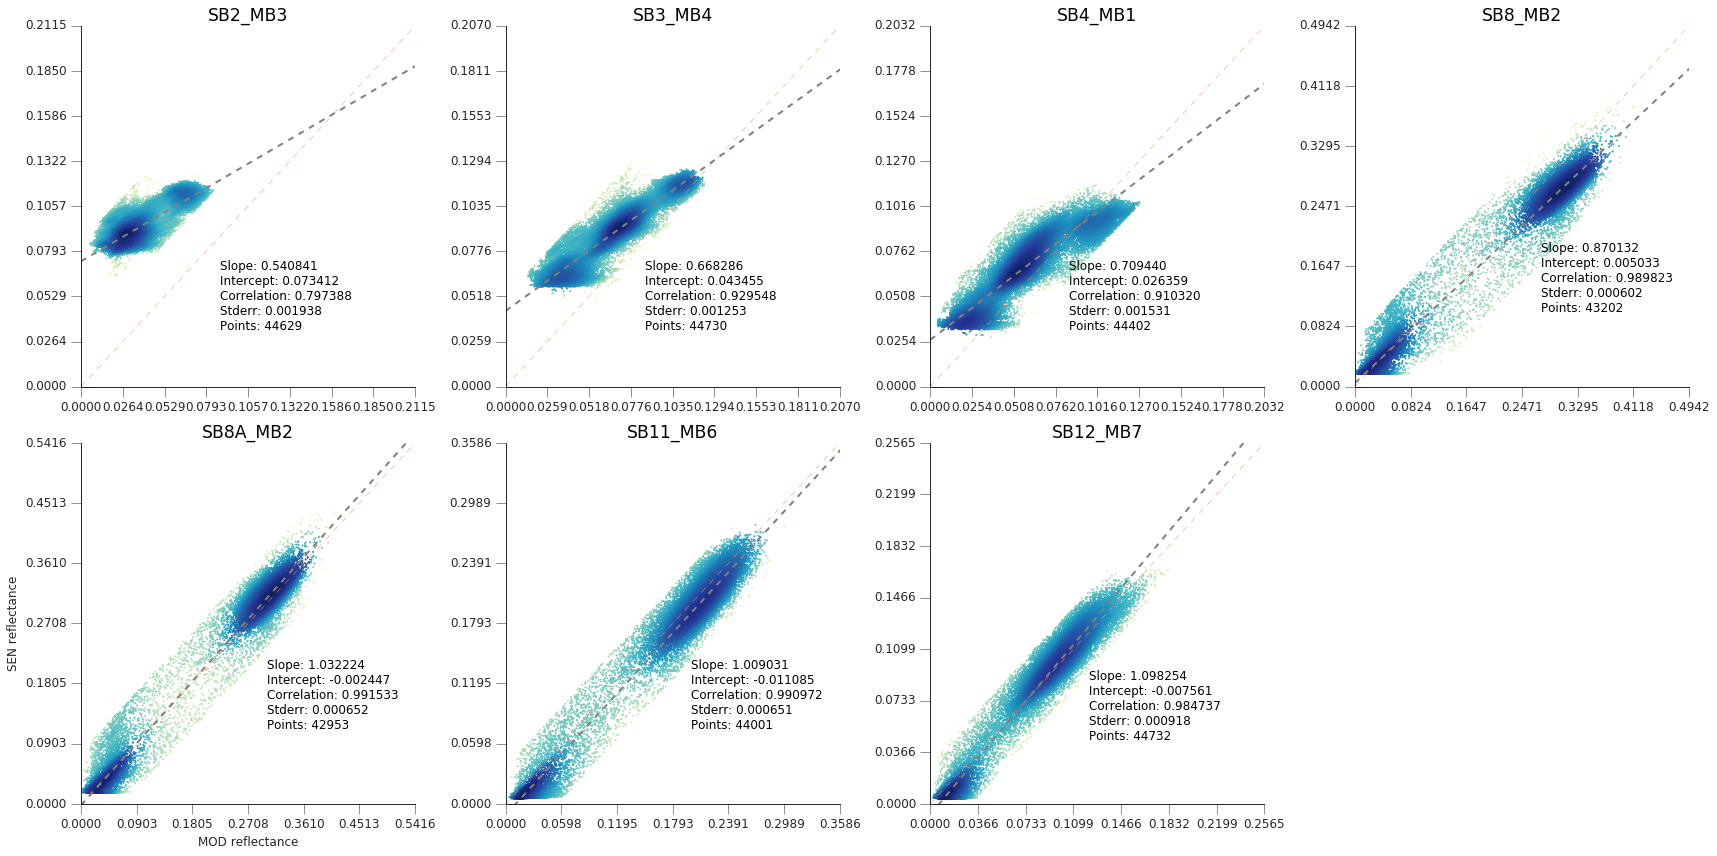

In [5]:
to_regs = applied(lat, lon, spath, mfile, general_psf)
to_reg = [[i[3],i[4]] for i in to_regs]
plot_config()
fig = plt.figure()
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(24,12))
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8A_MB2,SB11_MB6,SB12_MB7').split(',')
cmap = cm.get_cmap('YlGnBu')
psfsolve = []
for i in range(7):
    ax = fig.add_subplot(gs[i])
    s,m = to_reg[i]
    
    mval = np.nanmax([s,m])
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='',norm=colors.LogNorm(vmin=z.min(), vmax=z.max()*1.2), cmap = cmap)
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    slope,inter, rval, pval, std = r = scipy.stats.linregress(m,s)
    ax.set_title('%s'%names[i])
    ax.text(mval*(4./6.),mval*(1.5/6.),'Slope: %02f \nIntercept: %02f \nCorrelation: %02f \nStderr: %02f \nPoints: %s'%(slope,inter, rval, std, len(m)), 
        )
    pretty_axes(ax)
    ax.set_xlim(0,mval)
    ax.set_ylim(0,mval)
    ax.set_yticks(np.arange(0,mval+0.1,mval/5.))
    ax.set_xticks(np.arange(0,mval+0.1,mval/5.))
    if i==4:
        ax.set_xlabel ( "MOD reflectance")
        ax.set_ylabel ( "SEN reflectance")
    psfsolve.append([slope,inter])
plt.tight_layout()

In [6]:
to_regs

[[2,
  array([ 115,  115,  115, ..., 9883, 9883, 9883]),
  array([ 123,  169,  215, ..., 9814, 9860, 9907]),
  array([ 0.08234912,  0.08224272,  0.08226018, ...,  0.08917313,
          0.08829254,  0.08771967]),
  masked_array(data = [0.011 0.02 0.02 ..., 0.022596884448709383 0.022582022799025162
   0.021596884448709382],
               mask = [False False False ..., False False False],
         fill_value = 1e+20)],
 [3,
  array([ 115,  115,  115, ..., 9883, 9883, 9883]),
  array([ 123,  169,  215, ..., 9814, 9860, 9907]),
  array([ 0.05826799,  0.05819136,  0.05826821, ...,  0.08832323,
          0.0877037 ,  0.08670878]),
  masked_array(data = [0.02 0.027 0.039 ..., 0.05587567551478561 0.05786081386510139
   0.05487567551478561],
               mask = [False False False ..., False False False],
         fill_value = 1e+20)],
 [4,
  array([ 115,  115,  115, ..., 9883, 9883, 9883]),
  array([ 123,  169,  215, ..., 9814, 9860, 9907]),
  array([ 0.0342312 ,  0.03425307,  0.0343003 , ...

In [9]:
gps = parallel_rw_pkl(None, '6S_emulation_continential', 'r')

In [13]:
b2_gp = gps[0][0]

In [14]:
b2_gp

<gp_emulator.GaussianProcess.GaussianProcess instance at 0x7f5380c88e18>

In [18]:
tx = mgrs.MGRS()
tx.toMGRS(-0.41667,34.2, MGRSPrecision=4)

'36MXE33545394'

In [19]:
imgx = 9999-5394; imgy = 3354
imgx, imgy

(4605, 3354)

In [21]:
indx, indy = to_regs[0][1], to_regs[0][2]
ms = (indx>4000)&(indx<5000)&(indy>3000)&(indy<4000)
aoi = np.where(ms)

In [25]:
fpath = '/home/ucfafyi/DATA/Sentinel/s_data/36/M/XE/2016/1/8/0/'
atmos = readmeteo(fpath+'auxiliary/ECMWFT')
ozone = np.mean(atmos['TCO3']*4.6728972)
water = np.mean(atmos['TCWV']/10.)
print water, ozone
mete = readxml(fpath+'metadata.xml')
sz = mete['mSz']
sa = mete['mSa']
vz = mete['mVz']
va = mete['mVa']

No meteo data!!!
0.0 0.0


In [42]:
def atm(p,sref = None, sen_rsr = None, band = None, angles = None):
    #print p
    aot550, water, ozone = p
    sa,sz, va, vz = angles
    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'
    s = SixS(path)
    ss = []    
    s = SixS(path)
    s.altitudes.set_target_sea_level()
    s.altitudes.set_sensor_satellite_level()
    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
    s.geometry = Geometry.User()
    s.geometry.solar_a = sa
    s.geometry.solar_z = sz
    s.geometry.view_a = va[band]
    s.geometry.view_z = vz[band]
    srsp = sen_rsr[band]
    wv, we = swl[srsp!=0]/1000.,srsp[srsp!=0]
    mi,ma = round(wv.min(),3),round(wv.max(),3)
    f = interpolate.interp1d(wv,we)
    xnew = np.arange(mi,ma,0.0025)
    ynew = f(xnew)
    s.wavelength = Wavelength(xnew[0],xnew[-1],ynew)
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)
    s.aot550 = aot550
    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)
    s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromReflectance(sref)
    s.run()
    return s.outputs.atmos_corrected_reflectance_lambertian

def cost(p, args = None):
    if any(p<0):
        return 10000
    else:
        sref, mref, sen_rsr , band , angles = args
        ss = atm(p, sref = sref, sen_rsr = sen_rsr, band = band, angles = angles)
        cost = abs(mref-ss)
        return cost

In [45]:
p = np.array([0.2,1.89847212426, 0.0263747354372])
#up = np.array([1,1,1])
#down = np.array([0, 0, 0])
#bounds = np.array([down, up])

solved = []
def opt(i):
    args = to_regs[0][3][aoi[0][i]], to_regs[0][4][aoi[0][i]], sen_rsr,0, [sa,sz, va, vz]
    psolve = optimize.fmin(cost,p, full_output=1, args=(args,))
    print psolve
    return [to_regs[0][1][aoi[0][i]], to_regs[0][2][aoi[0][i]],psolve]

In [47]:
sen_rsp = pd.ExcelFile('sp_rep/Sentbands.xlsx')
swl = np.array(sen_rsp.parse('Spectral Responses')['SR_WL'])
cname= 'SR_AV_B2', 'SR_AV_B3', 'SR_AV_B4', 'SR_AV_B8', 'SR_AV_B8A', 'SR_AV_B11', 'SR_AV_B12'
sen_rsr = [np.array(sen_rsp.parse('Spectral Responses')[i]) for i in cname]

In [49]:
pool = multiprocessing.Pool(processes = 16)
retval = pool.map(opt, range(len(aoi[0])))
pool.close()
pool.join()

Optimization terminated successfully.
         Current function value: 0.003180
         Iterations: 45
         Function evaluations: 101
(array([  8.19143591e-04,   2.28717665e+00,   4.05750929e-02]), 0.0031800000000000023, 45, 101, 0)
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 71
(array([ 0.14154985,  2.04790294,  0.03104147]), 0.0, 31, 71, 0)
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 72
(array([ 0.18376004,  1.92680104,  0.0282239 ]), 0.0, 28, 72, 0)
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 74
(array([ 0.17871009,  1.9561156 ,  0.02854955]), 0.0, 28, 74, 0)
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 29
         Function evaluations: 73
(array([ 0.2315

In [51]:
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in retval]).T

In [55]:
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-4001).astype(int), (aerosols[1]-3001).astype(int)] = aerosols[2]

In [60]:
weights = (~np.isnan(aero_map)).astype('float')

In [83]:
sm_aaro = smoothn(aero_map,s=10,W=weights, verbose=True, isrobust=True)

tol 1.0 nit 0
tol 2.34068480098 nit 1
tol 2.09352705107 nit 2
tol 1.9786177211 nit 3
tol 1.43206454211 nit 4
tol 1.12548235781 nit 5
tol 0.753383275448 nit 6
tol 0.537998637914 nit 7
tol 0.373730329109 nit 8
tol 0.262493673083 nit 9
tol 0.193186145213 nit 10
tol 0.138267698045 nit 11
tol 0.109119308438 nit 12
tol 0.0822250207671 nit 13
tol 0.0701894212931 nit 14
tol 0.0570644880563 nit 15
tol 0.0519020156746 nit 16
tol 0.0452353725534 nit 17
tol 0.0425674811187 nit 18
tol 0.0388138601085 nit 19
tol 0.0370410729835 nit 20
tol 0.0346455787791 nit 21
tol 0.0332594008654 nit 22
tol 0.0315624871608 nit 23
tol 0.0304043193776 nit 24
tol 0.0291117242307 nit 25
tol 0.0281222503634 nit 26
tol 0.0270890232593 nit 27
tol 0.0262360512301 nit 28
tol 0.0253824895989 nit 29
tol 0.0246423693843 nit 30
tol 0.0239201854261 nit 31
tol 0.0232735116716 nit 32
tol 0.0226511549466 nit 33
tol 0.0220817858533 nit 34
tol 0.0215374614712 nit 35
tol 0.0210321140238 nit 36
tol 0.0205501409064 nit 37
tol 0.02009801

In [84]:
sm_aaro

(array([[  3.57427967e-02,   3.56544952e-02,   3.54783513e-02, ...,
           6.42383115e-03,   6.42777594e-03,   6.42975862e-03],
        [  3.57984307e-02,   3.57100554e-02,   3.55337643e-02, ...,
           6.43988456e-03,   6.44382994e-03,   6.44581292e-03],
        [  3.59093413e-02,   3.58208189e-02,   3.56442341e-02, ...,
           6.47189970e-03,   6.47584627e-03,   6.47782986e-03],
        ..., 
        [  3.03027353e-05,   3.02569748e-05,   3.01630019e-05, ...,
           4.43003310e-02,   4.43601672e-02,   4.43901812e-02],
        [  3.05077294e-05,   3.04638412e-05,   3.03734413e-05, ...,
           4.43862799e-02,   4.44461473e-02,   4.44761769e-02],
        [  3.06124209e-05,   3.05694610e-05,   3.04807847e-05, ...,
           4.44293808e-02,   4.44892637e-02,   4.45193013e-02]]),
 10.0,
 True,
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ..., 

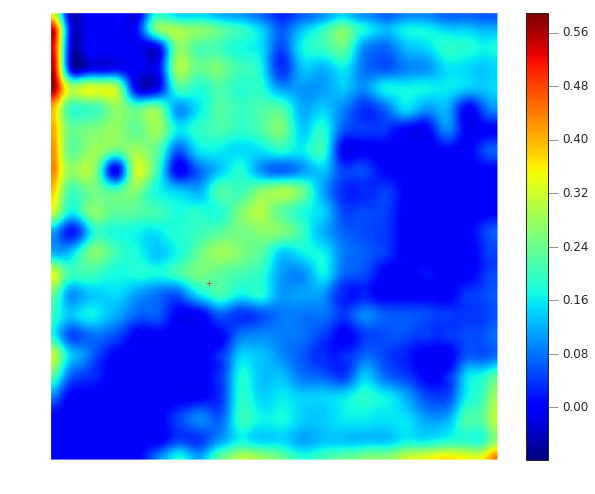

In [116]:
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot( 3354-3000,4605-4000, 'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()

In [90]:
sm_aaro[0][3354-3000,4605-4000]*10

0.13540140340641871

In [106]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160101_160113_ICIPE-Mbita.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
0,02:01:2016,08:50:09,2.368160,NaN,0.064813,0.094365,0.129394,NaN,NaN,NaN,NaN,NaN,0.128713,NaN,NaN,0.173773,NaN,0.178231,0.192943,2.055412
1,03:01:2016,07:50:30,3.326736,NaN,0.080135,0.109159,0.149125,NaN,NaN,NaN,NaN,NaN,0.166912,NaN,NaN,0.215723,NaN,0.229181,0.249797,2.460286
2,08:01:2016,08:52:51,8.370035,NaN,0.085927,0.113256,0.148657,NaN,NaN,NaN,NaN,NaN,0.150786,NaN,NaN,0.198540,NaN,0.205035,0.222860,2.384336
3,12:01:2016,10:54:21,12.454410,NaN,0.107987,0.142127,0.193289,NaN,NaN,NaN,NaN,NaN,0.226030,NaN,NaN,0.285978,NaN,0.308833,0.336287,2.974710
4,13:01:2016,06:30:27,13.271146,NaN,0.130653,0.168144,0.233446,NaN,NaN,NaN,NaN,NaN,0.309605,NaN,NaN,0.372915,NaN,0.415229,0.451695,3.259599
5,13:01:2016,07:54:42,13.329653,NaN,0.133303,0.176127,0.249295,NaN,NaN,NaN,NaN,NaN,0.321634,NaN,NaN,0.395560,NaN,0.436909,0.476814,3.396804
6,13:01:2016,08:54:50,13.371412,NaN,0.119581,0.160223,0.226455,NaN,NaN,NaN,NaN,NaN,0.282570,NaN,NaN,0.353661,NaN,0.389288,0.426094,3.312468


In [107]:
aero

array([[ 0.064813,  0.094365,  0.129394,  0.128713,  0.173773,  0.178231,
         0.192943],
       [ 0.080135,  0.109159,  0.149125,  0.166912,  0.215723,  0.229181,
         0.249797],
       [ 0.085927,  0.113256,  0.148657,  0.150786,  0.19854 ,  0.205035,
         0.22286 ],
       [ 0.107987,  0.142127,  0.193289,  0.22603 ,  0.285978,  0.308833,
         0.336287],
       [ 0.130653,  0.168144,  0.233446,  0.309605,  0.372915,  0.415229,
         0.451695],
       [ 0.133303,  0.176127,  0.249295,  0.321634,  0.39556 ,  0.436909,
         0.476814],
       [ 0.119581,  0.160223,  0.226455,  0.28257 ,  0.353661,  0.389288,
         0.426094]])

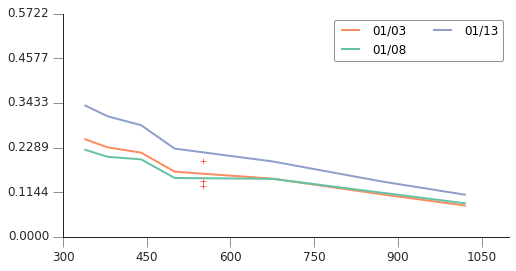

In [114]:
aot550 = []
dates = ['01/03', '01/08', '01/13']
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero[1:4,::-1]):
    ax.plot(wv[::-1], j, label = dates[i])
    f = interpolate.interp1d(wv[::-1],j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [119]:
aot550

[array(0.1430485562223447),
 array(0.12954691079337288),
 array(0.19539355947984738)]

In [121]:
parallel_rw_pkl(retval, 'ICIPE_atm', 'w')

Length of data: 467
Length of data: 35
